In [68]:
import pandas as pd 
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt # memanggil matplotlib sebagai plt
import numpy as np #memanggil numpy sebagai np
import seaborn as sns #memanggil seaborn sebagai sns
from sklearn.model_selection import train_test_split #memanggil train_test dari sklearn model
from feature_engine.outliers import Winsorizer #memanggil winsorizer dari feature engine
from scipy.stats import kendalltau, pearsonr #memanggil kendalltau dan pearsonr dari scipy.stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler #mamanggil minmaxscaler dan StandardScaler dari sklearn processing
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder #memanggil model encode onehotencoder,LabelEncoder,OrdinalEncoder dari sklearn processing
import pickle #memanggil pickle
from sklearn.metrics import classification_report, accuracy_score,  f1_score #memanggil classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score dari sklearn.metrics 
from sklearn.model_selection import GridSearchCV, cross_val_score #memanggil GridSearchCV, cross_val_score, StratifiedKFold, learning_curve dari from sklearn.model_selection
from sklearn.compose import ColumnTransformer, make_column_selector as selector #Memanggil ColumnTransformer, make_column_selector dari sklearn.compose sebagai selector
from sklearn.pipeline import Pipeline #Memanggil Pipeline dari sklearn.pipelin
from sklearn.neighbors import KNeighborsClassifier #Memanggil  KNeighborsClassifier dari sklearn.neighbors
from sklearn.svm import SVC #Memanggil  SVC dari sklearn.svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [69]:
df = pd.read_csv('./dataset/original dataset/company2_full_fix2.csv')
df

,ID PELANGGAN,PENGGUNAAN KWH,BLTH,NAMA PELANGGAN,AREA,FKM,FRT,STATUS,AMR,STATUS AMR,DAYA,TARIF
0,110000233589,6216.00,2013-08,XL-BTS-MBH-4228,Kab Aceh Barat,1,1.0,TERBIT BILLING,AMR,ACTIVE,33000,B2
1,110000233589,6211.00,2013-09,XL-BTS-MBH-4228,Kab Aceh Barat,1,1.0,TERBIT BILLING,AMR,ACTIVE,33000,B2
2,110000233589,5976.00,2013-10,XL-BTS-MBH-4228,Kab Aceh Barat,1,1.0,TERBIT BILLING,AMR,ACTIVE,33000,B2
3,110000233589,6169.00,2013-11,XL-BTS-MBH-4228,Kab Aceh Barat,1,1.0,TERBIT BILLING,AMR,ACTIVE,33000,B2
4,110000233589,6202.89,2013-12,XL-BTS-MBH-4228,Kab Aceh Barat,1,1.0,TERBIT BILLING,AMR,ACTIVE,33000,B2
...,...,...,...,...,...,...,...,...,...,...,...,...
873595,566602161650,1858.80,2023-03,XL-JAW-BT-TGR-0120,Kab Tangerang,1,1.0,TERBIT BILLING,AMR,ACTIVE,6600,B2
873596,566602161650,1859.88,2023-04,XL-JAW-BT-TGR-0120,Kab Tangerang,1,1.0,TERBIT BILLING,AMR,ACTIVE,6600,B2
873597,566602161650,1863.05,2023-05,XL-JAW-BT-TGR-0120,Kab Tangerang,1,1.0,TERBIT BILLING,AMR,ACTIVE,6600,B2
873598,566602161650,1856.68,2023-06,XL-JAW-BT-TGR-0120,Kab Tangerang,1,1.0,TERBIT BILLING,AMR,ACTIVE,6600,B2


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873600 entries, 0 to 873599
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID PELANGGAN    873600 non-null  int64  
 1   PENGGUNAAN KWH  873600 non-null  float64
 2   BLTH            873600 non-null  object 
 3   NAMA PELANGGAN  873600 non-null  object 
 4   AREA            873600 non-null  object 
 5   FKM             873600 non-null  int64  
 6   FRT             873600 non-null  float64
 7   STATUS          873600 non-null  object 
 8   AMR             873600 non-null  object 
 9   STATUS AMR      873600 non-null  object 
 10  DAYA            873600 non-null  int64  
 11  TARIF           873600 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 80.0+ MB


In [71]:
A = df['FKM'].unique()
B = df['FRT'].unique()
C = df['STATUS'].unique()
D = df['STATUS AMR'].unique()
E = df['TARIF'].unique()
F = df['AMR'].unique()

print (A)
print (B)
print (C)
print (D)
print (E)
print (F)

[  1  20  40  50 800  30  60  15]
[1. 2. 5. 0.]
['TERBIT BILLING' 'TIDAK TERBIT BILLING']
['ACTIVE' '-' 'STOCK']
['B2' 'L' 'LB2' 'B3']
['AMR' 'NO AMR']


In [72]:
# Filter data dengan kondisi 'KWH' kurang dari 0 dan 'city_id' di antara 3000 - 4000
filtered_data = df[(df['PENGGUNAAN KWH'] < 0)]

filtered_data

,ID PELANGGAN,PENGGUNAAN KWH,BLTH,NAMA PELANGGAN,AREA,FKM,FRT,STATUS,AMR,STATUS AMR,DAYA,TARIF
3484,111060031311,-2662.11,2013-12,"PT,EXCELCOMINDO PRATAMA/B",Kab Aceh Besar,1,1.0,TERBIT BILLING,AMR,ACTIVE,10600,B2
3489,111060031311,-1984.55,2014-05,"PT,EXCELCOMINDO PRATAMA/B",Kab Aceh Besar,1,1.0,TERBIT BILLING,AMR,ACTIVE,10600,B2
3499,111060031311,-1335.01,2015-03,"PT,EXCELCOMINDO PRATAMA/B",Kab Aceh Besar,1,1.0,TERBIT BILLING,AMR,ACTIVE,10600,B2
22804,112200278982,-6976.31,2013-12,XL-BTS-LHK-D249,Kab Bireuen,1,1.0,TERBIT BILLING,AMR,ACTIVE,10600,B2
22809,112200278982,-105.99,2014-05,XL-BTS-LHK-D249,Kab Bireuen,1,1.0,TERBIT BILLING,AMR,ACTIVE,10600,B2
...,...,...,...,...,...,...,...,...,...,...,...,...
870674,566601372965,-943.44,2019-10,XL-BTS-TGR-3472330G,Kab Tangerang,1,1.0,TERBIT BILLING,AMR,ACTIVE,13200,B2
870692,566601372965,-140.86,2021-04,XL-BTS-TGR-3472330G,Kab Tangerang,1,1.0,TERBIT BILLING,AMR,ACTIVE,13200,B2
870698,566601372965,-986.47,2021-10,XL-BTS-TGR-3472330G,Kab Tangerang,1,1.0,TERBIT BILLING,AMR,ACTIVE,13200,B2
870713,566601372965,-309.04,2023-01,XL-BTS-TGR-3472330G,Kab Tangerang,1,1.0,TERBIT BILLING,AMR,ACTIVE,13200,B2


In [73]:
df = df.drop(filtered_data.index)
df.head()

,ID PELANGGAN,PENGGUNAAN KWH,BLTH,NAMA PELANGGAN,AREA,FKM,FRT,STATUS,AMR,STATUS AMR,DAYA,TARIF
0,110000233589,6216.00,2013-08,XL-BTS-MBH-4228,Kab Aceh Barat,1,1.0,TERBIT BILLING,AMR,ACTIVE,33000,B2
1,110000233589,6211.00,2013-09,XL-BTS-MBH-4228,Kab Aceh Barat,1,1.0,TERBIT BILLING,AMR,ACTIVE,33000,B2
2,110000233589,5976.00,2013-10,XL-BTS-MBH-4228,Kab Aceh Barat,1,1.0,TERBIT BILLING,AMR,ACTIVE,33000,B2
3,110000233589,6169.00,2013-11,XL-BTS-MBH-4228,Kab Aceh Barat,1,1.0,TERBIT BILLING,AMR,ACTIVE,33000,B2
4,110000233589,6202.89,2013-12,XL-BTS-MBH-4228,Kab Aceh Barat,1,1.0,TERBIT BILLING,AMR,ACTIVE,33000,B2


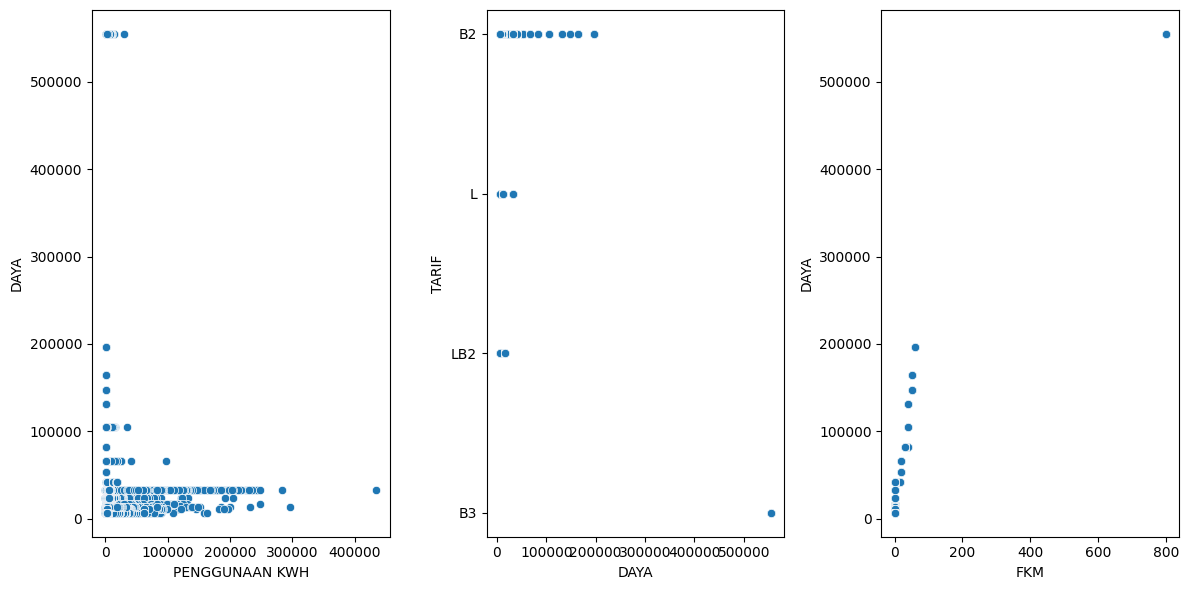

In [74]:
plt.figure(figsize=(12, 6))  

# Scatterplot 1
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x="PENGGUNAAN KWH", y="DAYA")
plt.title('')

# Scatterplot 2
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x="DAYA", y="TARIF")
plt.title('')

# Scatterplot 3
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x="FKM", y="DAYA")
plt.title('')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


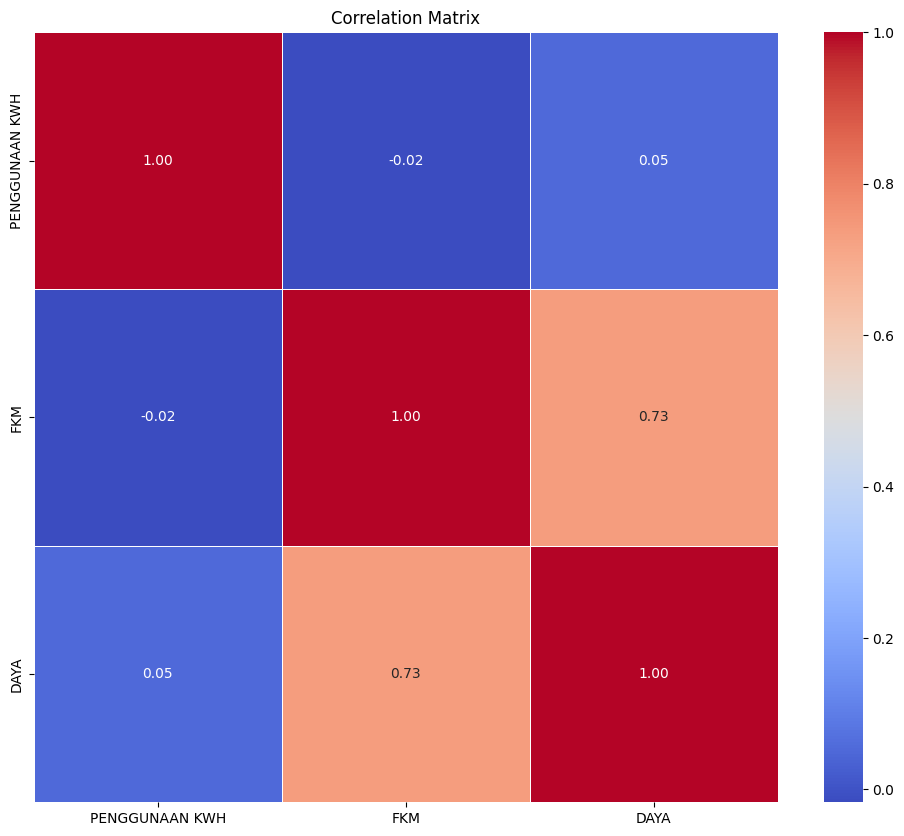

In [75]:
# list kolom yang akan diuji korelasinya
list = ['PENGGUNAAN KWH', 'FKM','DAYA']
# mendefinisikan ukuran gambar
plt.figure(figsize=(12, 10))
# plot korelasi setiap variable menggunakan heatmap
sns.heatmap(df[list].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Memberikan judul
plt.title('Correlation Matrix')
# menampilkan correlation matrix
plt.show()

In [76]:
pd.set_option('display.max_colwidth', None)

cat_cols = (df.select_dtypes(include=['int64', 'float64']).columns)

listItem = []
for col in cat_cols:
    listItem.append([col, df[col].nunique()])

result_df = pd.DataFrame(listItem, columns=['nama kolom', 'jumlah nilai unique'])
result_df


,nama kolom,jumlah nilai unique
0,ID PELANGGAN,7280
1,PENGGUNAAN KWH,346425
2,FKM,8
3,FRT,4
4,DAYA,19


In [77]:
df = df.drop(columns=['FRT'])

In [78]:
pd.set_option('display.max_colwidth', None)

cat_cols = (df.select_dtypes(include=['object']).columns)

listItem = []
for col in cat_cols:
    listItem.append([col, df[col].nunique()])

result_df = pd.DataFrame(listItem, columns=['nama kolom', 'jumlah nilai unique'])
result_df

,nama kolom,jumlah nilai unique
0,BLTH,120
1,NAMA PELANGGAN,6891
2,AREA,335
3,STATUS,2
4,AMR,2
5,STATUS AMR,3
6,TARIF,4


In [79]:
df = df.drop(columns=['STATUS','STATUS AMR','AREA','NAMA PELANGGAN','AMR'])

In [80]:
df

,ID PELANGGAN,PENGGUNAAN KWH,BLTH,FKM,DAYA,TARIF
0,110000233589,6216.00,2013-08,1,33000,B2
1,110000233589,6211.00,2013-09,1,33000,B2
2,110000233589,5976.00,2013-10,1,33000,B2
3,110000233589,6169.00,2013-11,1,33000,B2
4,110000233589,6202.89,2013-12,1,33000,B2
...,...,...,...,...,...,...
873595,566602161650,1858.80,2023-03,1,6600,B2
873596,566602161650,1859.88,2023-04,1,6600,B2
873597,566602161650,1863.05,2023-05,1,6600,B2
873598,566602161650,1856.68,2023-06,1,6600,B2


In [81]:
bool_columns = df.select_dtypes(include='bool').columns
print("\nKolom dengan tipe data boolean:")
print(bool_columns)


Kolom dengan tipe data boolean:
Index([], dtype='object')


In [82]:
num_cols = (df.select_dtypes(exclude=['object','period[M]']).columns)

listItem= []

for col in num_cols:
  listItem.append([col, df[col].skew()])

pd.DataFrame(columns=['nama kolom', 'nilai skewness'], data= listItem)


,nama kolom,nilai skewness
0,ID PELANGGAN,0.084168
1,PENGGUNAAN KWH,15.622780
2,FKM,62.623324
3,DAYA,10.795073
